# Гришин Андрей Валерьевич, ИКБО-11-22.
## Практическая работа 3

# Задание 1
Загрузить данные из файла “insurance.csv”.

In [200]:
!pip install pandas


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [201]:
import pandas as pd

insurance = pd.read_csv('insurance.csv')

insurance.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Задание 2
С помощью метода describe() посмотреть статистику по данным. Сделать
выводы.


In [202]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


- Средний возраст 39.2 года
- Средний ИМТ 30.7
- Большинство клиентов не курят

# Задание 3
Построить гистограммы для числовых показателей. Сделать выводы.

In [203]:
!pip install matplotlib


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


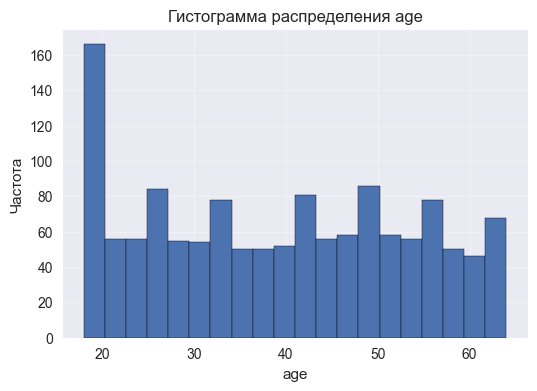

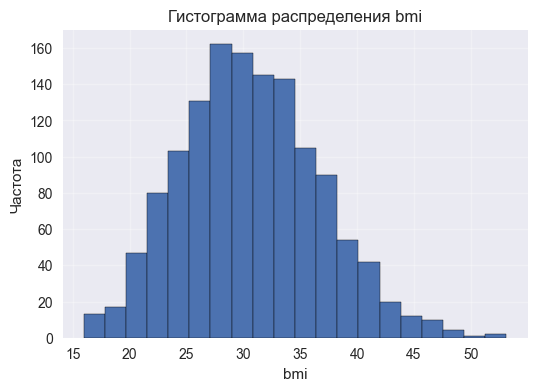

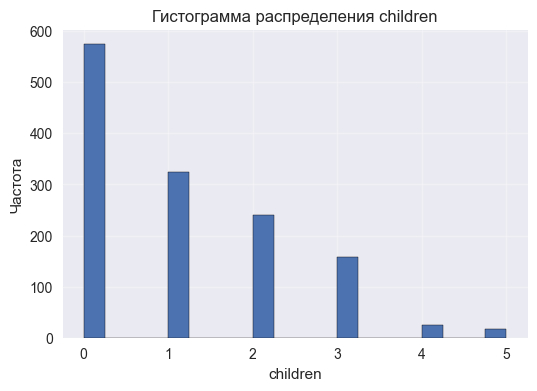

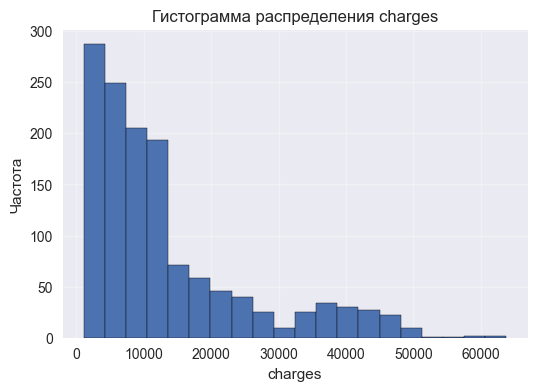

In [204]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')

num_cols = ['age', 'bmi', 'children', 'charges']

for col in num_cols:
    plt.figure(figsize=(6,4))
    plt.hist(insurance[col], bins=20, edgecolor='black')
    plt.title(f'Гистограмма распределения {col}')
    plt.xlabel(col)
    plt.ylabel('Частота')
    plt.grid(alpha=0.3)
    plt.show()

- Распределение возраста близко к равномерному
- Большинство людей имеют ИМТ > 25
- Большинство без детей
- Сильно правостороннее распределение по расходам

# Задание 4
Найти меры центральной тенденции и меры разброса для индекса массы
тела (bmi) и расходов (charges). Отобразить результаты в виде текста и на
гистограммах (3 вертикальные линии). Добавить легенду на графики.
Сделать выводы

In [205]:
for col in ['bmi', 'charges']:
    mean = insurance[col].mean()
    median = insurance[col].median()
    mode = insurance[col].mode()[0]
    std = insurance[col].std()

    print(f'--- {col.upper()} ---')
    print(f'Среднее: {mean:.2f}')
    print(f'Медиана: {median:.2f}')
    print(f'Мода: {mode:.2f}')
    print(f'Стандартное отклонение: {std:.2f}\n')

--- BMI ---
Среднее: 30.66
Медиана: 30.40
Мода: 32.30
Стандартное отклонение: 6.10

--- CHARGES ---
Среднее: 13270.42
Медиана: 9382.03
Мода: 1639.56
Стандартное отклонение: 12110.01



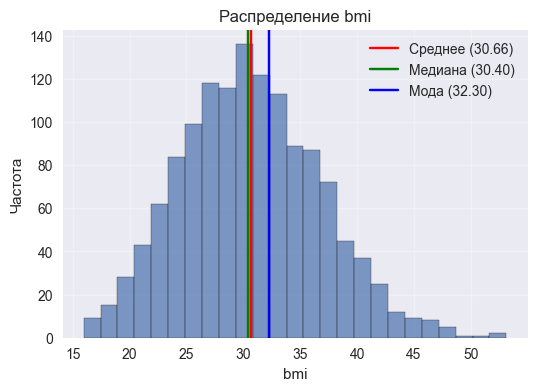

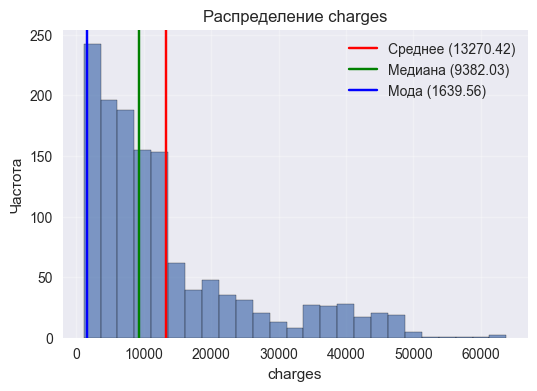

In [206]:
for col in ['bmi', 'charges']:
    mean = insurance[col].mean()
    median = insurance[col].median()
    mode = insurance[col].mode()[0]

    plt.figure(figsize=(6,4))
    plt.hist(insurance[col], bins=25, edgecolor='black', alpha=0.7)

    plt.axvline(mean, color='red', label=f'Среднее ({mean:.2f})')
    plt.axvline(median, color='green', label=f'Медиана ({median:.2f})')
    plt.axvline(mode, color='blue', label=f'Мода ({mode:.2f})')

    plt.title(f'Распределение {col}')
    plt.xlabel(col)
    plt.ylabel('Частота')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

- У bmi среднее и медиана почти совпадают, то есть распределение симметричное
- У charges среднее больше медианы, то есть распределение скошено вправо
- Разброс расходов значительно выше, чем у BMI

# Задание 5
Построить box-plot для числовых показателей. Названия графиков должны
соответствовать названиям признаков. Сделать выводы.

In [207]:
!pip install seaborn


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


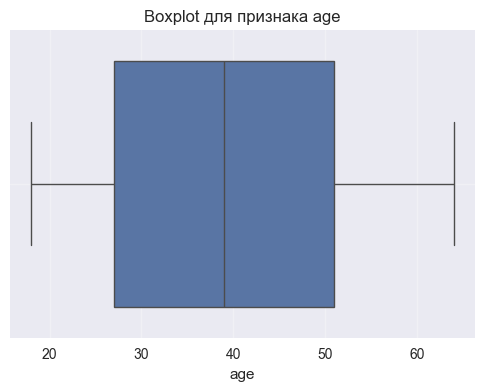

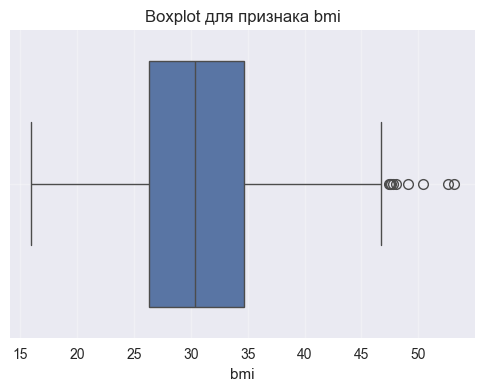

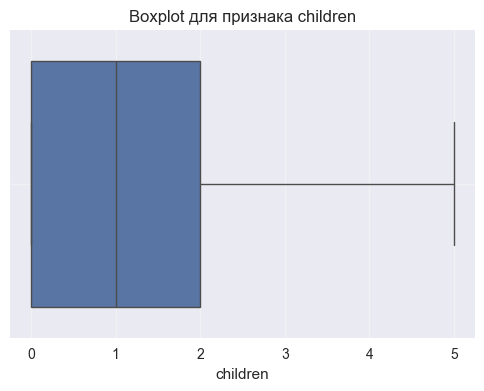

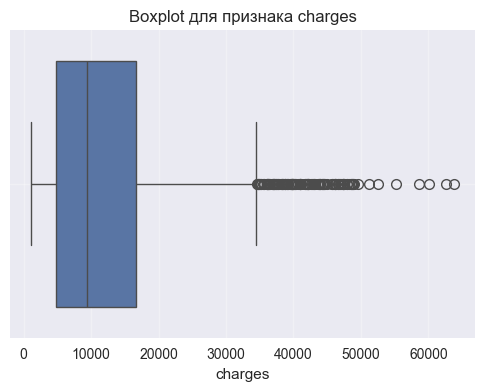

In [208]:
import seaborn

for col in num_cols:
    plt.figure(figsize=(6, 4))
    seaborn.boxplot(x=insurance[col])
    plt.title(f'Boxplot для признака {col}')
    plt.xlabel(col)
    plt.grid(alpha=0.3)
    plt.show()

- У bmi и charges есть выбросы — отдельные клиенты с атипично высокими значениями.
- Распределение age симметричное, без ярких выбросов.
- Количество детей асимметрично (большинство без детей или 1-2 ребенка)

# Задание 6
Используя признак charges или imb, проверить, выполняется ли
центральная предельная теорема. Использовать различные длины выборок
n. Количество выборок = 300. Вывести результат в виде гистограмм. Найти
стандартное отклонение и среднее для полученных распределений.
Сделать выводы

In [209]:
!pip install numpy


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


n = 10


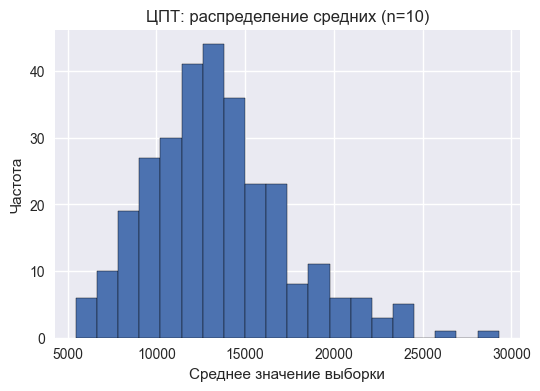

Стандартное отклонение: 3938.00
Среднее распределения: 13470.49


n = 100


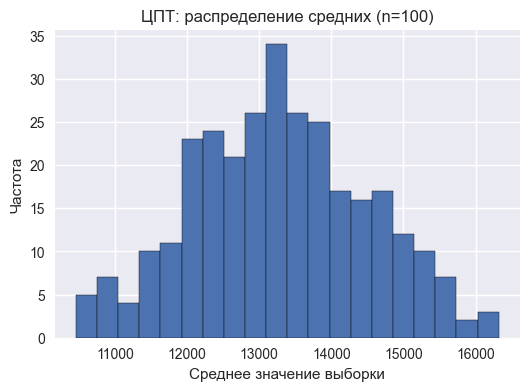

Стандартное отклонение: 1209.98
Среднее распределения: 13284.18


n = 1000


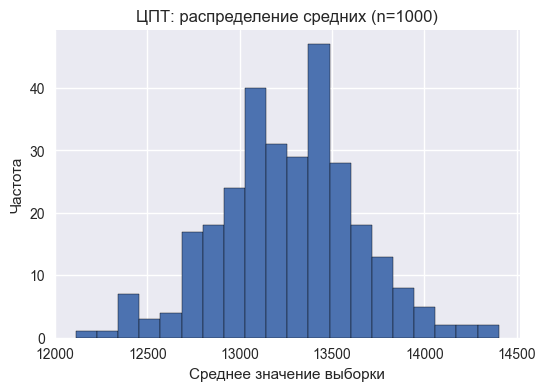

Стандартное отклонение: 380.60
Среднее распределения: 13263.76




In [210]:
import numpy as np

np.random.seed(42)

sample_sizes = [10, 100, 1000]
num_count = 300

data = insurance['charges']

for n in sample_sizes:
    sample_means = [np.mean(np.random.choice(data, n, replace=True)) for _ in range(num_count)]

    plt.figure(figsize=(6,4))
    plt.hist(sample_means, bins=20, edgecolor='black')
    plt.title(f'ЦПТ: распределение средних (n={n})')
    plt.xlabel('Среднее значение выборки')
    plt.ylabel('Частота')

    print(f'n = {n}')

    plt.show()

    print(f'Стандартное отклонение: {np.std(sample_means):.2f}')
    print(f'Среднее распределения: {np.mean(sample_means):.2f}\n\n')

- При малом размере выборки средние значения сильно колеблются.
- При увеличении размера выборки распределение средних стремится к нормальному.
- Стандартное отклонение средних уменьшается.

# Задание 7
Построить 95% и 99% доверительный интервал для среднего значения
расходов и среднего значения индекса массы тела

In [211]:
import math

cols = ['bmi', 'charges']

def get_conf_interval(series, conf=0.95):
    n = len(series)
    mean = series.mean()
    sd = series.std(ddof=1)
    se = sd / math.sqrt(n)

    if conf == 0.95:
        z = 1.96
    elif conf == 0.99:
        z = 2.58
    else:
        z = 1.0

    low = mean - z * se
    high = mean + z * se
    return mean, low, high

for col in cols:
    mean, low95, high95 = get_conf_interval(insurance[col], 0.95)
    mean, low99, high99 = get_conf_interval(insurance[col], 0.99)

    print(f'\nПоказатель: {col}')
    print(f'Среднее: {mean:.2f}')
    print(f'95% доверительный интервал: [{low95:.2f}, {high95:.2f}]')
    print(f'99% доверительный интервал: [{low99:.2f}, {high99:.2f}]')


Показатель: bmi
Среднее: 30.66
95% доверительный интервал: [30.34, 30.99]
99% доверительный интервал: [30.23, 31.09]

Показатель: charges
Среднее: 13270.42
95% доверительный интервал: [12621.53, 13919.31]
99% доверительный интервал: [12416.27, 14124.58]


# Задание 8
Проверить распределения следующих признаков на нормальность: индекс
массы тела, расходы. Сформулировать нулевую и альтернативную
гипотезы. Для каждого признака использовать KS-тест и q-q plot. Сделать
выводы на основе полученных p-значений.

In [212]:
!pip install scipy


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



Проверка нормальности для BMI:
KS-статистика: 0.0261, p-value: 0.3163


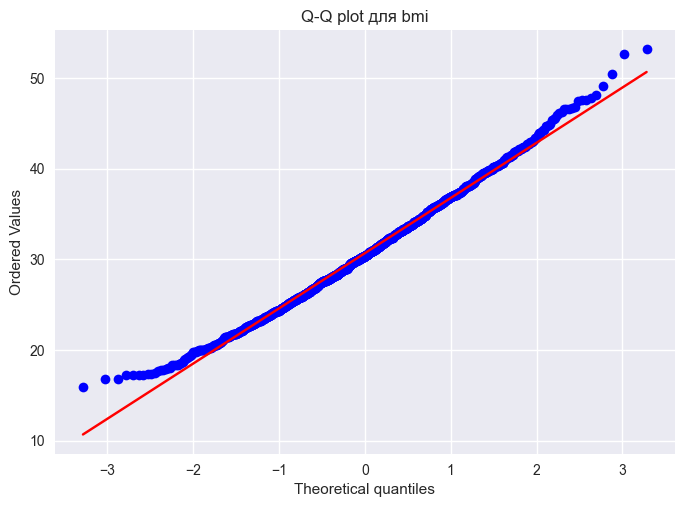


Проверка нормальности для CHARGES:
KS-статистика: 0.1885, p-value: 0.0000


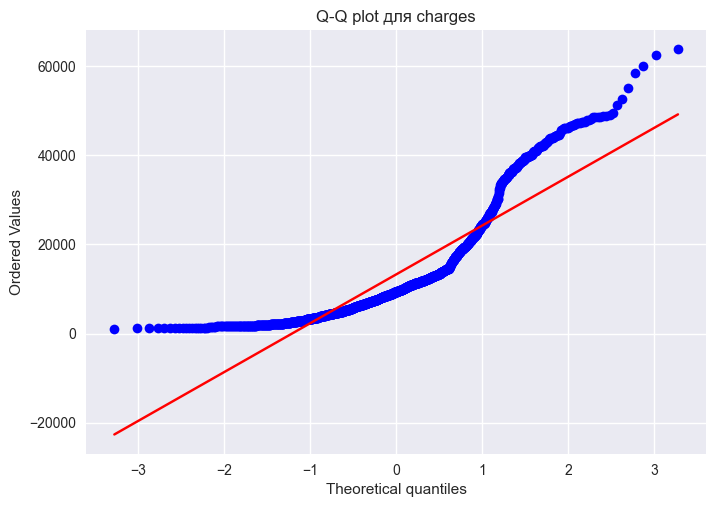

In [213]:
from scipy import stats

for col in cols:
    data = insurance[col]
    z = (data - data.mean()) / data.std(ddof=1)

    ks_stat, p_value = stats.kstest(z, 'norm')
    print(f'\nПроверка нормальности для {col.upper()}:')
    print(f'KS-статистика: {ks_stat:.4f}, p-value: {p_value:.4f}')

    stats.probplot(data, dist='norm', plot=plt)
    plt.title(f'Q-Q plot для {col}')
    plt.show()

- По KS-тесту и Q-Q-plot bmi ближе к нормальному распределению
- charges отклоняется от нормального — выраженная правосторонняя асимметрия

# Задание 9
Загрузить данные из файла “ECDCCases.csv”.

In [214]:
ecdc = pd.read_csv('ECDCCases.csv')

ecdc.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
4,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266


# Задание 10
Проверить в данных наличие пропущенных значений. Вывести
количество пропущенных значений в процентах. Удалить два признака, в
которых больше всех пропущенных значений. Для оставшихся признаков
обработать пропуски: для категориального признака использовать
заполнение значением по умолчанию (например, «other»), для числового
признака использовать заполнение медианным значением. Показать, что
пропусков больше в данных нет

In [215]:
missing_percent = ecdc.isna().mean() * 100
print('Проценты пропусков:\n', missing_percent)

cols_to_drop = missing_percent.sort_values(ascending=False).head(2).index
ecdc = ecdc.drop(columns=cols_to_drop)
print(f'\nУдалены признаки: {list(cols_to_drop)}')

num_cols = ecdc.select_dtypes(include=['int64','float64']).columns
cat_cols = ecdc.select_dtypes(include=['object']).columns

for col in ecdc.columns:
    if ecdc[col].dtype == 'object':
        ecdc[col] = ecdc[col].fillna("other")
    else:
        ecdc[col] = ecdc[col].fillna(ecdc[col].median())

print('\nОставшиеся пропуски после обработки:')
print(ecdc.isna().sum())


Проценты пропусков:
 dateRep                                                       0.000000
day                                                           0.000000
month                                                         0.000000
year                                                          0.000000
cases                                                         0.000000
deaths                                                        0.000000
countriesAndTerritories                                       0.000000
geoId                                                         0.444236
countryterritoryCode                                          0.198695
popData2019                                                   0.198695
continentExp                                                  0.000000
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    4.650750
dtype: float64

Удалены признаки: ['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000', 'geoId']

Оставшиеся пропуски 

# Задание 11
Посмотреть статистику по данным, используя describe(). Сделать выводы
о том, какие признаки содержат выбросы. Посмотреть, для каких стран
количество смертей в день превысило 3000 и сколько таких дней было.

In [216]:
ecdc.describe()

high_deaths = ecdc[ecdc['deaths'] > 3000]

print('Страны, где количество смертей в день превышало 3000:')
print(high_deaths['countriesAndTerritories'].value_counts())

Страны, где количество смертей в день превышало 3000:
countriesAndTerritories
United_States_of_America    6
Peru                        2
Argentina                   1
Mexico                      1
Ecuador                     1
Name: count, dtype: int64


# Задание 12
Найти дублирование данных. Удалить дубликаты

In [217]:
duplicates_count = ecdc.duplicated().sum()
print(f'Количество дублирующих строк: {duplicates_count}')

if duplicates_count > 0:
    ecdc = ecdc.drop_duplicates()
    print('Дубликаты удалены.')
else:
    print('Дубликатов не найдено.')

print(f'Осталось дубликатов: {ecdc.duplicated().sum()}')

Количество дублирующих строк: 4
Дубликаты удалены.
Осталось дубликатов: 0


# Задание 13
Загрузить данные из файла “bmi.csv”. Взять оттуда две выборки. Одна
выборка – это индекс массы тела людей c региона northwest, вторая
выборка – это индекс массы тела людей с региона southwest. Сравнить
средние значения этих выборок, используя t-критерий Стьюдента.
Предварительно проверить выборки на нормальность (критерий ШопироУилка) и на гомогенность дисперсии (критерий Бартлетта)

In [218]:
from scipy.stats import shapiro, bartlett, ttest_ind

bmi_data = pd.read_csv('bmi.csv')

northwest = bmi_data[bmi_data['region'] == 'northwest']['bmi']
southwest = bmi_data[bmi_data['region'] == 'southwest']['bmi']

print('Проверка нормальности распределений (Шапиро–Уилка):')

for name, sample in [('northwest', northwest), ('southwest', southwest)]:
    stat, p = shapiro(sample)
    print(f'{name}: W={stat:.4f}, p-value={p:.4f}')

bart_stat, bart_p = bartlett(northwest, southwest)
print(f'\nКритерий Бартлетта: statistic={bart_stat:.4f}, p-value={bart_p:.4f}')

t_stat, p_val = ttest_ind(northwest, southwest, equal_var=True)
print(f'\nT-критерий Стьюдента:')
print(f't={t_stat:.4f}, p-value={p_val:.4f}')
if p_val < 0.05:
    print("Средние значения ИМТ статистически различаются.")
else:
    print("Нет статистически значимых различий.")

Проверка нормальности распределений (Шапиро–Уилка):
northwest: W=0.9955, p-value=0.4656
southwest: W=0.9949, p-value=0.3630

Критерий Бартлетта: statistic=3.4001, p-value=0.0652

T-критерий Стьюдента:
t=-3.2844, p-value=0.0011
Средние значения ИМТ статистически различаются.


# Задание 14
Кубик бросили 600 раз, получили следующие результаты:

---
N Количество выпадений
1 97
2 98
3 109
4 95
5 97
6 104
---
С помощью критерия Хи-квадрат проверить, является ли полученное
распределение равномерным. Использовать функцию
scipy.stats.chisquare()

In [219]:
from scipy.stats import chisquare

observed = np.array([97, 98, 109, 95, 97, 104])
expected = np.array([100, 100, 100, 100, 100, 100])

chi2_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

print(f'Xи-статистика: {chi2_stat:.4f}')
print(f'p-value: {p_value:.6f}')

if p_value > 0.05:
    print("Распределение равномерное")
else:
    print("Распределение не равномерное")

Xи-статистика: 1.4400
p-value: 0.919888
Распределение равномерное


# Задание 15
С помощью критерия Хи-квадрат проверить, являются ли переменные
зависимыми.
Создать датафрейм, используя следующий код:
data = pd.DataFrame({'Женат': [89,17,11,43,22,1],
 'Гражданский брак': [80,22,20,35,6,4],
 'Не состоит в отношениях': [35,44,35,6,8,22]})
data.index = ['Полный рабочий день','Частичная занятость','Временно не
работает','На домохозяйстве','На пенсии','Учёба']
Использовать функцию scipy.stats.chi2_contingency().
Влияет ли семейное положение на занятость?

In [220]:
from scipy.stats import chi2_contingency

data = pd.DataFrame({
    'Женат': [89, 17, 11, 43, 22, 1],
    'Гражданский брак': [80, 22, 20, 35, 6, 4],
    'Не состоит в отношениях': [35, 44, 35, 6, 8, 22]
})

data.index = [
    'Полный рабочий день',
    'Частичная занятость',
    'Временно не работает',
    'На домохозяйстве',
    'На пенсии',
    'Учёба'
]

print(data)

chi2, p, dof, exp = chi2_contingency(data)
print(f'Xи-статистика: {chi2:.4f}, p-value: {p:.6f}')

print('\nОжидаемые частоты:')
print(pd.DataFrame(exp, index=data.index, columns=data.columns))

if p < 0.05:
    print("Семейное положение влияет на занятость")
else:
    print("Семейное положение не влияет на занятость")

                      Женат  Гражданский брак  Не состоит в отношениях
Полный рабочий день      89                80                       35
Частичная занятость      17                22                       44
Временно не работает     11                20                       35
На домохозяйстве         43                35                        6
На пенсии                22                 6                        8
Учёба                     1                 4                       22
Xи-статистика: 122.2965, p-value: 0.000000

Ожидаемые частоты:
                       Женат  Гражданский брак  Не состоит в отношениях
Полный рабочий день   74.664            68.136                     61.2
Частичная занятость   30.378            27.722                     24.9
Временно не работает  24.156            22.044                     19.8
На домохозяйстве      30.744            28.056                     25.2
На пенсии             13.176            12.024                     10.8
Учёба   